# Quantum ML Project - Binary Classification on the Parity problem | Simple Quantum Circuit | Task (a)

Install pennylane

In [1]:
# %pip install pennylane
# %pip install pandas
# %pip install matplotlib

In [2]:
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
Data is generated using the parity function. The parity function is a function that returns 1 if the number of 1s in the input is odd, and 0 otherwise. The input is a binary string of length n. The parity function is a well-known example of a function that is not efficiently learnable by a classical neural network. However, it can be learned efficiently by a quantum neural network.

## Read

In [3]:
train_classA = np.loadtxt('./data/classA_train.dat')
train_classB = np.loadtxt('./data/classB_train.dat')
test_classA = np.loadtxt('./data/classA_test.dat')
test_classB = np.loadtxt('./data/classB_test.dat')
train_data = np.vstack((train_classA, train_classB))
train_labels = np.hstack((np.zeros(len(train_classA)), np.ones(len(train_classB))))

## Preprocess

In [4]:
train_classA -= 0.5
train_classB -= 0.5
test_classA -= 0.5
test_classB -= 0.5

Creating train and test datasets

In [5]:
train_data = np.vstack((train_classA, train_classB))
train_labels = np.hstack((np.zeros(len(train_classA)), np.ones(len(train_classB))))

test_data = np.vstack((test_classA, test_classB))
test_labels = np.hstack((np.zeros(len(test_classA)), np.ones(len(test_classB))))

Preview

In [6]:
train_data

tensor([[-0.52136932,  0.51634261,  0.57685187],
        [ 0.47967195,  0.47521001, -0.48276349],
        [ 0.45851495,  0.48880249, -0.47751312],
        [ 0.47287287,  0.50130472, -0.48129676],
        [ 0.4490846 ,  0.49955922, -0.53082429],
        [-0.46906929, -0.51708618, -0.51294948],
        [ 0.40494731,  0.57586463, -0.5228194 ],
        [-0.46868174, -0.51639052, -0.50394778],
        [ 0.45230147,  0.53798005, -0.47490086],
        [ 0.44109225, -0.48876122,  0.49780467],
        [ 0.55928369,  0.53811759, -0.49537057],
        [-0.48554956,  0.5311928 ,  0.53043502],
        [-0.49101668, -0.52985789, -0.49328596],
        [ 0.56489058,  0.52622874, -0.47390937],
        [ 0.50082764, -0.5481794 ,  0.49814355],
        [-0.49541045, -0.46895463, -0.44893712],
        [-0.45864197, -0.47720196, -0.53279515],
        [ 0.56208121, -0.49005089,  0.50610096],
        [-0.57611053,  0.46526223,  0.47765986],
        [ 0.4342591 , -0.49482992,  0.52829108],
        [-0.4194763 

In [7]:
test_data

tensor([[ 0.4879638 ,  0.54024352, -0.46494221],
        [-0.49177858, -0.51371639, -0.47245236],
        [ 0.49295538, -0.4814586 ,  0.48787918],
        [ 0.55597339,  0.5324364 , -0.49658654],
        [-0.52495464, -0.48868671, -0.51545709],
        [-0.45134428, -0.52187662, -0.53744429],
        [-0.51112591,  0.53013485,  0.51654904],
        [ 0.52916993, -0.49962332,  0.51428079],
        [-0.4897708 ,  0.4922424 ,  0.5334223 ],
        [-0.46431262, -0.45484039, -0.50036212],
        [ 0.51488301, -0.53164158, -0.52451988],
        [-0.49771912,  0.52398959, -0.49891081],
        [-0.50994703,  0.45064989, -0.48652751],
        [ 0.41944514, -0.54143044, -0.54457641],
        [ 0.52296955, -0.50002518, -0.52334696],
        [-0.45378063,  0.47989627, -0.47546236],
        [-0.47659954,  0.4897321 , -0.51949139],
        [-0.4566875 ,  0.51162301, -0.47473584],
        [ 0.45832342,  0.51347606,  0.48019078],
        [ 0.46999107, -0.51461362, -0.50094802]], requires_grad=True)

## Visualizing input data

2-dimensional. showing the difficulty of the problem in a 2-dimensional space.

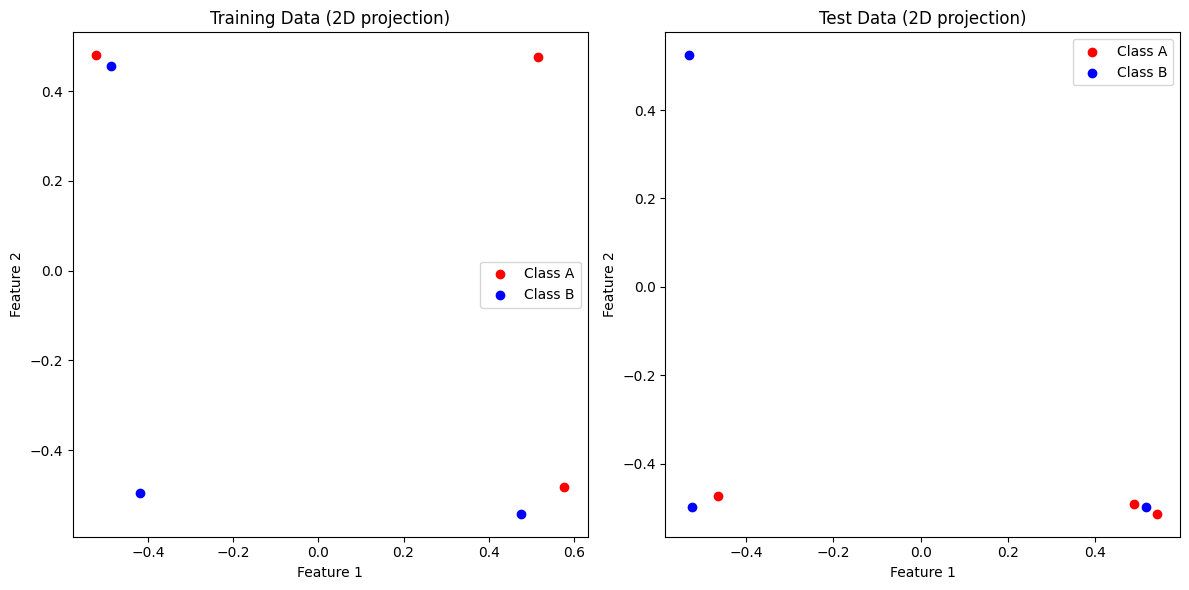

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(train_classA[0], train_classA[1], color='red', label='Class A')
ax1.scatter(train_classB[0], train_classB[1], color='blue', label='Class B')
ax1.set_title('Training Data (2D projection)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()

ax2.scatter(test_classA[0], test_classA[1], color='red', label='Class A')
ax2.scatter(test_classB[0], test_classB[1], color='blue', label='Class B')
ax2.set_title('Test Data (2D projection)')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.tight_layout()
plt.show()

3-dimensional. Cubes are now well separated.

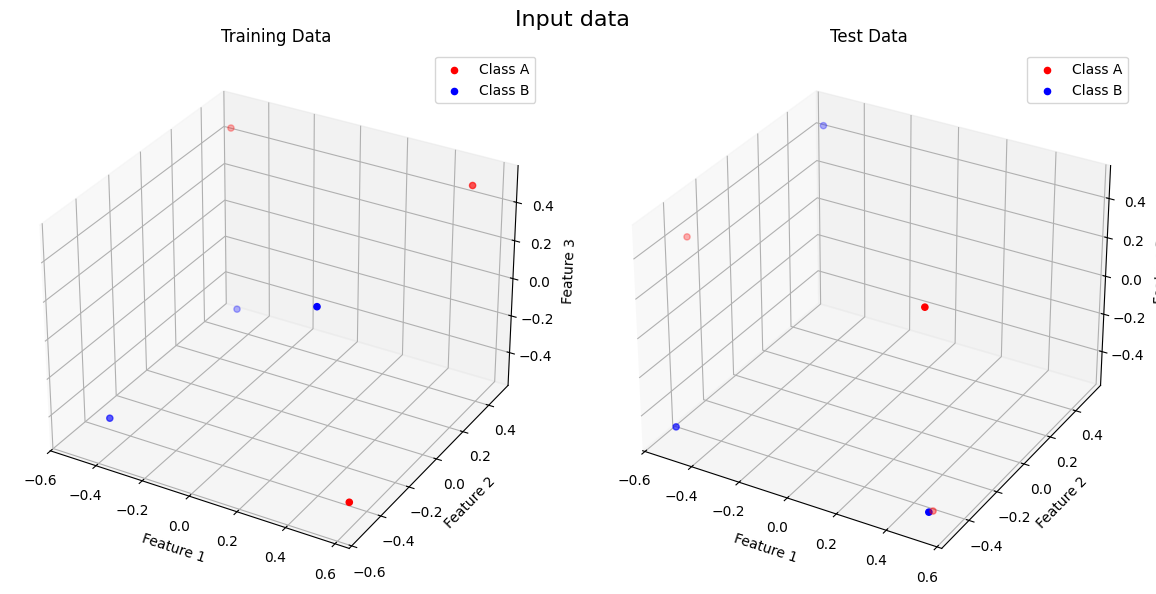

In [9]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(train_classA[0], train_classA[1], train_classA[2], color='red', label='Class A')
ax1.scatter(train_classB[0], train_classB[1], train_classB[2], color='blue', label='Class B')
ax1.set_title('Training Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(test_classA[0], test_classA[1], test_classA[2], color='red', label='Class A')
ax2.scatter(test_classB[0], test_classB[1], test_classB[2], color='blue', label='Class B')
ax2.set_title('Test Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_zlabel('Feature 3')
ax2.legend()

fig.suptitle('Input data', fontsize=16)
plt.tight_layout()
plt.show()

# Quantum Binary Classifier

For building the classifier I will use the pennylane python toolkit.

## Constracting Variational Quantum Circuit (VQC)
Solving:
**a) the design of the circuit you have built including measurements.**

Defining the number of qubits and layers.

In [10]:
num_qubits = 3
dev = qml.device("default.qubit", wires=num_qubits)

In [11]:
def variational_circuit(weights, x):
    qml.templates.AngleEmbedding(x, wires=range(num_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(num_qubits))

@qml.qnode(dev)
def circuit(weights, x):
    variational_circuit(weights, x)
    return qml.expval(qml.PauliZ(0))

In [12]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

##  Cost function

Solving:
**b) the cost function you have selected build by the expectation value of measurements at the end of the circuit.**


### Mean Squared Error (MSE) Cost Function

**Definition**:
$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

where:
- $ N$ is the number of samples.
- $ y_i $ is the true label of the $ i $-th sample.
- $ \hat{y}_i $ is the predicted label of the $ i $-th sample.


In [13]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2
    loss = loss / len(labels)
    return loss

def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

Initilizing with random parameters following a normal distribution.

In [14]:
np.random.seed(0)
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, num_qubits)
bias_init = np.array(0.0, requires_grad=True)

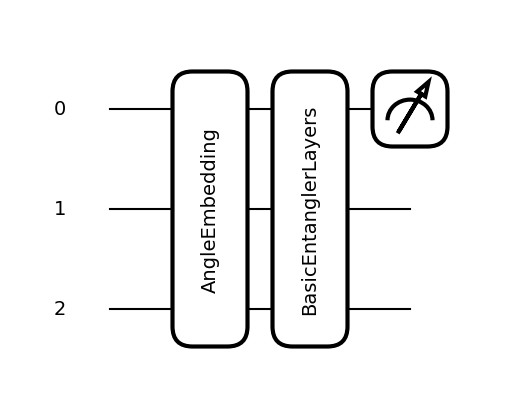

In [15]:
init_params = weights_init

fig, ax = qml.draw_mpl(circuit)(init_params, np.zeros(num_qubits))
plt.show()

# Training the Quantum Binary Classifier and selecting Optimizer

Solving:
**c) your selected optimization method.**

In [16]:
from pennylane.optimize import NesterovMomentumOptimizer

opt = NesterovMomentumOptimizer(0.5)
batch_size = 5
weights = weights_init
bias = bias_init

X = train_data
Y = train_labels

for it in range(50):
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)
    
    predictions = [variational_classifier(weights, bias, x) for x in X]
    acc = np.mean((np.array(predictions) > 0.5) == Y)
    print(f"Iter: {it+1} | Cost: {cost(weights, bias, X, Y):.4f} | Accuracy: {acc:.4f}")
predictions = [variational_classifier(weights, bias, x) for x in test_data]

Iter: 1 | Cost: 0.3305 | Accuracy: 0.5000
Iter: 2 | Cost: 0.2858 | Accuracy: 0.5000
Iter: 3 | Cost: 0.2450 | Accuracy: 0.6000
Iter: 4 | Cost: 0.2471 | Accuracy: 0.6000
Iter: 5 | Cost: 0.2871 | Accuracy: 0.5000
Iter: 6 | Cost: 0.2567 | Accuracy: 0.5000
Iter: 7 | Cost: 0.2777 | Accuracy: 0.5000
Iter: 8 | Cost: 0.3205 | Accuracy: 0.4750
Iter: 9 | Cost: 0.3322 | Accuracy: 0.4000
Iter: 10 | Cost: 0.3344 | Accuracy: 0.4000
Iter: 11 | Cost: 0.2967 | Accuracy: 0.4000
Iter: 12 | Cost: 0.3908 | Accuracy: 0.5000
Iter: 13 | Cost: 0.2631 | Accuracy: 0.4000
Iter: 14 | Cost: 0.3985 | Accuracy: 0.5000
Iter: 15 | Cost: 0.6573 | Accuracy: 0.5000
Iter: 16 | Cost: 0.6386 | Accuracy: 0.5000
Iter: 17 | Cost: 1.8701 | Accuracy: 0.5000
Iter: 18 | Cost: 0.5709 | Accuracy: 0.5250
Iter: 19 | Cost: 0.5692 | Accuracy: 0.5000
Iter: 20 | Cost: 0.3498 | Accuracy: 0.5000
Iter: 21 | Cost: 0.4486 | Accuracy: 0.5000
Iter: 22 | Cost: 0.5172 | Accuracy: 0.5000
Iter: 23 | Cost: 0.3386 | Accuracy: 0.5000
Iter: 24 | Cost: 0.5

# Evaluation


Solving:
**d) the outcomes of classification (e.g. accuracy) on train and test data.**

In [17]:
accuracy = np.mean((np.array(predictions) > 0.5) == test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5000


Test Accuracy: 0.5000


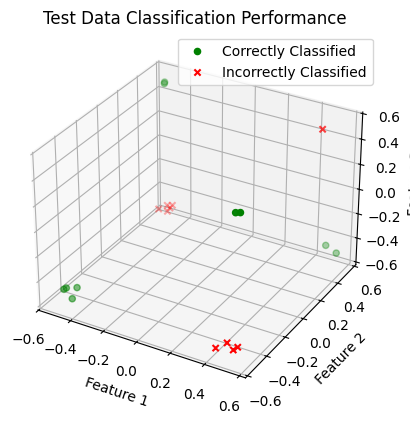

In [18]:
from mpl_toolkits.mplot3d import Axes3D

predictions = np.array([variational_classifier(weights, bias, x) for x in test_data])
accuracy = np.mean((predictions > 0.5) == test_labels)
print(f"Test Accuracy: {accuracy:.4f}")
correctly_classified = (predictions > 0.5) == test_labels
incorrectly_classified = ~correctly_classified

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_data[correctly_classified, 0], test_data[correctly_classified, 1], test_data[correctly_classified, 2], 
           c='green', marker='o', label='Correctly Classified')

ax.scatter(test_data[incorrectly_classified, 0], test_data[incorrectly_classified, 1], test_data[incorrectly_classified, 2], 
           c='red', marker='x', label='Incorrectly Classified')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title("Test Data Classification Performance")
ax.legend()

plt.show()